In [1]:
from electron_reconstuction import *

In [2]:
test_brem_pre_label("./psiK_1000.root")

(1255, 9)
[00:40:18] WARNING: /private/var/folders/h4/xn394t6140g90b5dhr7hl1n40000gn/T/pip-install-1b5gzcgs/xgboost_e8996f132b654debbc7a5a7211bb9190/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.39397963700753
84.86055776892431


[01:04:31] WARNING: /private/var/folders/h4/xn394t6140g90b5dhr7hl1n40000gn/T/pip-install-1b5gzcgs/xgboost_e8996f132b654debbc7a5a7211bb9190/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100.0
93.48659003831418
3000


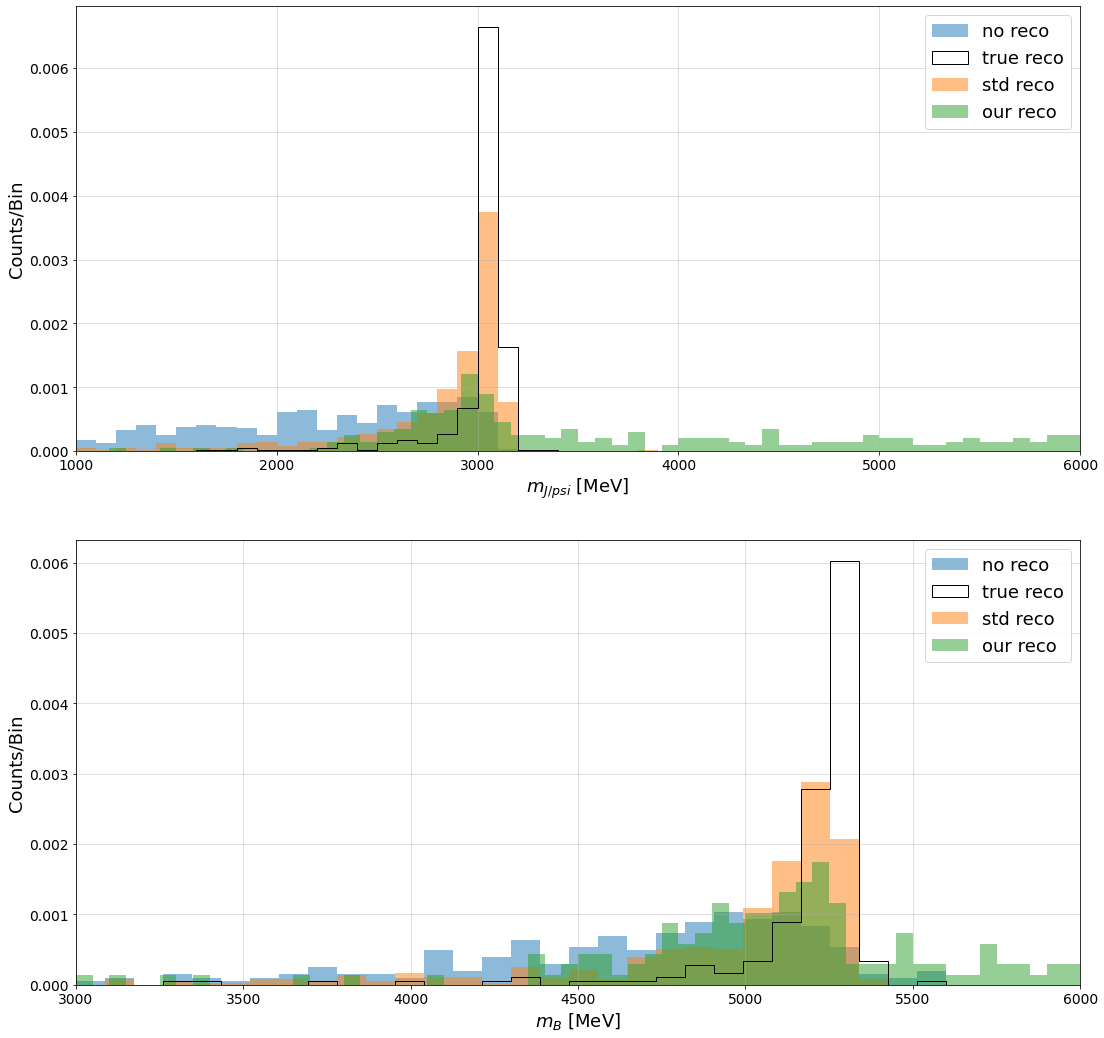

In [2]:
import matplotlib as mpl

event_data = unpack_data("./psiK_1000.root")
data = generate_data_mixing(event_data)

training_data, training_labels, validation_data, validation_labels = generate_prepared_data(data)
classifier = train_xgboost(training_data, training_labels, validation_data, validation_labels)
plot_masses(classifier, event_data, m_method=0, cutoff=3000)

In [1]:
from electron_reconstuction import *
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (20, 20)
event_data = unpack_data("./psiK_1000.root")
X, y = generate_brem_data_mixing(event_data)
train_X, train_y, val_X, val_y = generate_brem_prepared_data(X, y)
regressor = train_regressor(train_X, train_y, val_X, val_y)


[0.17308034 0.82998881]
[0.24290677 1.007987  ]
